In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/MyDrive/MDS0_K278_NguyenYenQuynhDan/NLP/RNN_LSTM'

/content/gdrive/MyDrive/MDS0_K278_NguyenYenQuynhDan/NLP/RNN_LSTM


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, Bidirectional, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline

In [5]:
review_df = pd.read_excel('review_preprocessed.xlsx')

In [6]:
review_df.isnull().sum()

Unnamed: 0     0
new_text      14
sentiment      0
dtype: int64

=> có dữ liệu null

In [7]:
review_df.dropna(inplace=True)

In [8]:
review_df.isnull().values.any()

False

=> xóa dữ liệu null

###Process data

In [9]:
X= review_df['new_text']
Y= review_df['sentiment']

In [10]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

max_words = 10000
max_len = 100

tok= Tokenizer(num_words= max_words)
tok.fit_on_texts(X)

X_sequences= tok.texts_to_sequences(X)
X_sequences_matrix= sequence.pad_sequences(X_sequences, maxlen= max_len)

In [11]:
rs= RandomUnderSampler(random_state=0)

In [12]:
X_rs, Y_rs= rs.fit_resample(X_sequences_matrix, Y)

In [13]:
# 0.8 Train, 0.2 test
X_train, X_test, Y_train, Y_test= train_test_split(X_rs, Y_rs, test_size=0.2)

In [14]:
print(X_train.shape)
print(X_test.shape)

(18968, 100)
(4742, 100)


###RNN_LTSM


In [15]:
# Define model here
def build_RNN():
  model = Sequential()
  model.add(Embedding(max_words, 50))
  model.add(LSTM(256))

  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(1,activation='sigmoid'))
  return model

In [16]:
model = build_RNN()

In [17]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 50)          500000    
                                                                 
 lstm (LSTM)                 (None, 256)               314368    
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               1

In [19]:
import datetime
t0 = datetime.datetime.now()
print(t0)

2022-09-27 08:57:34.035180


In [20]:
# fit
history = model.fit(X_train, Y_train,
                    batch_size=128,
                    epochs=200,
                    validation_split=0.2,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)]
                    )

Epoch 1/200
119/119 [==============================] - 9s 19ms/step - loss: 0.3673 - accuracy: 0.8371 - val_loss: 0.2794 - val_accuracy: 0.8893
Epoch 2/200
119/119 [==============================] - 2s 16ms/step - loss: 0.2389 - accuracy: 0.9079 - val_loss: 0.2809 - val_accuracy: 0.8996
Epoch 3/200
119/119 [==============================] - 2s 16ms/step - loss: 0.2126 - accuracy: 0.9187 - val_loss: 0.2799 - val_accuracy: 0.8951
Epoch 4/200
119/119 [==============================] - 2s 16ms/step - loss: 0.1867 - accuracy: 0.9282 - val_loss: 0.2759 - val_accuracy: 0.8996
Epoch 5/200
119/119 [==============================] - 2s 16ms/step - loss: 0.1653 - accuracy: 0.9394 - val_loss: 0.2893 - val_accuracy: 0.8914
Epoch 6/200
119/119 [==============================] - 2s 16ms/step - loss: 0.1494 - accuracy: 0.9453 - val_loss: 0.3161 - val_accuracy: 0.8859
Epoch 7/200
119/119 [==============================] - 2s 16ms/step - loss: 0.1309 - accuracy: 0.9519 - val_loss: 0.3488 - val_accuracy:

In [21]:
t1 = datetime.datetime.now()
print(t1-t0)

0:00:33.854858


In [22]:
history_frame = pd.DataFrame(history.history)

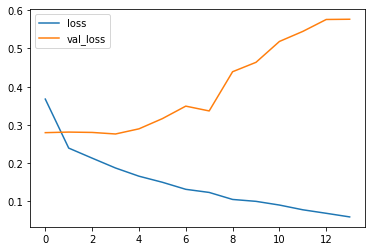

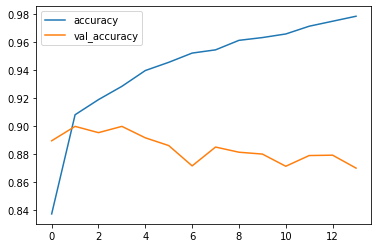

In [23]:
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()

In [24]:
accr = model.evaluate(X_test,Y_test)

149/149 [==============================] - 1s 4ms/step - loss: 0.5919 - accuracy: 0.8608


In [25]:
print('Test set\n  Loss: {:0.2f}%\n  Accuracy: {:0.2f}%'.format(accr[0]*100,accr[1]*100))

Test set
  Loss: 59.19%
  Accuracy: 86.08%


In [26]:
# Save the result
from tensorflow.keras.models import load_model
# Creates a HDF5 file 'my_model.h5'
model.save('RNN_LSTM_under.h5')

###Predict

In [27]:
model= load_model('RNN_LSTM_under.h5')

In [28]:
temp= model.predict(X_test)

In [29]:
temp

array([[7.7834632e-04],
       [3.5129827e-02],
       [1.1924690e-01],
       ...,
       [1.2452705e-07],
       [5.8545626e-04],
       [3.7455624e-01]], dtype=float32)

In [30]:
predict_df= pd.DataFrame(columns=['sentiment', 'predict'])
predict_df.sentiment= Y_test
predict_df.predict= temp

In [31]:
def result(temp):
    return 1 if temp>=0.5 else 0

In [32]:
predict_df.predict= predict_df.predict.apply(lambda x: result(x))

In [33]:
predict_df

,sentiment,predict
8736,0,0
10260,0,0
20690,1,0
4036,0,0
3172,0,0
...,...,...
2677,0,0
19257,1,1
4304,0,0
3527,0,0


In [34]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
confusion_matrix(predict_df['sentiment'], predict_df['predict'])

array([[2120,  298],
       [ 362, 1962]])

In [35]:
print(classification_report(predict_df['sentiment'], predict_df['predict']))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      2418
           1       0.87      0.84      0.86      2324

    accuracy                           0.86      4742
   macro avg       0.86      0.86      0.86      4742
weighted avg       0.86      0.86      0.86      4742

